In [83]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import itertools

# Datos del consumo por subestacion
data1 = pd.read_csv('electricity-consumption-processed.csv', engine='python', skipfooter=3, sep=';')
data1.columns
data1['datetime'] = pd.to_datetime(data1['datetime'], format='%Y-%m-%dT%H:%M:%S')
data1.set_index(['datetime'], inplace=True)
filtered_data = data1[data1['feeder'].isin(['A1'])]
filtered_data.dropna(inplace=True)
data = filtered_data.drop(['feeder', 'substation'], axis=1)
data
# Agrupar por fecha y obtener el máximo en la columna 'valor'
maximos_por_dia=data.groupby(data['datetime'].dt.date)['consumption'].max().reset_index()

# Renombrar las columnas

#maximos_por_dia.columns = ['datetime', 'consumption_max']

# Mostrar los resultados
#maximos_por_dia

C:\Users\user\AppData\Local\Temp\ipykernel_7948\3168175412.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.dropna(inplace=True)


KeyError: 'datetime'

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 34272 entries, 2017-01-01 00:00:00 to 2020-12-16 23:00:00
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   consumption  34272 non-null  float64
dtypes: float64(1)
memory usage: 535.5 KB


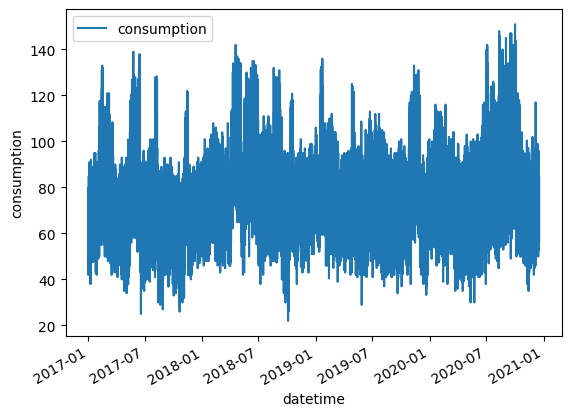

In [44]:
# Plot the data
data.plot()
plt.ylabel('consumption')
plt.xlabel('datetime')
plt.show()

In [66]:
data=data['2017-01-01T00:00:00':'2017-12-31T00:00:00']
data


,consumption
datetime,
2017-01-01 00:00:00,64.671363
2017-01-01 01:00:00,58.000000
2017-01-01 02:00:00,58.000000
2017-01-01 03:00:00,58.000000
2017-01-01 04:00:00,52.000000
...,...
2017-12-30 20:00:00,86.000000
2017-12-30 21:00:00,86.000000
2017-12-30 22:00:00,78.000000


In [ ]:
start_date = '2017-01-01T00:00:00'
end_date = '2018-01-01T00:00:00'
filtered_data = data[(data['datetime'] >= start_date) & (data['datetime'] <= end_date)]

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provide

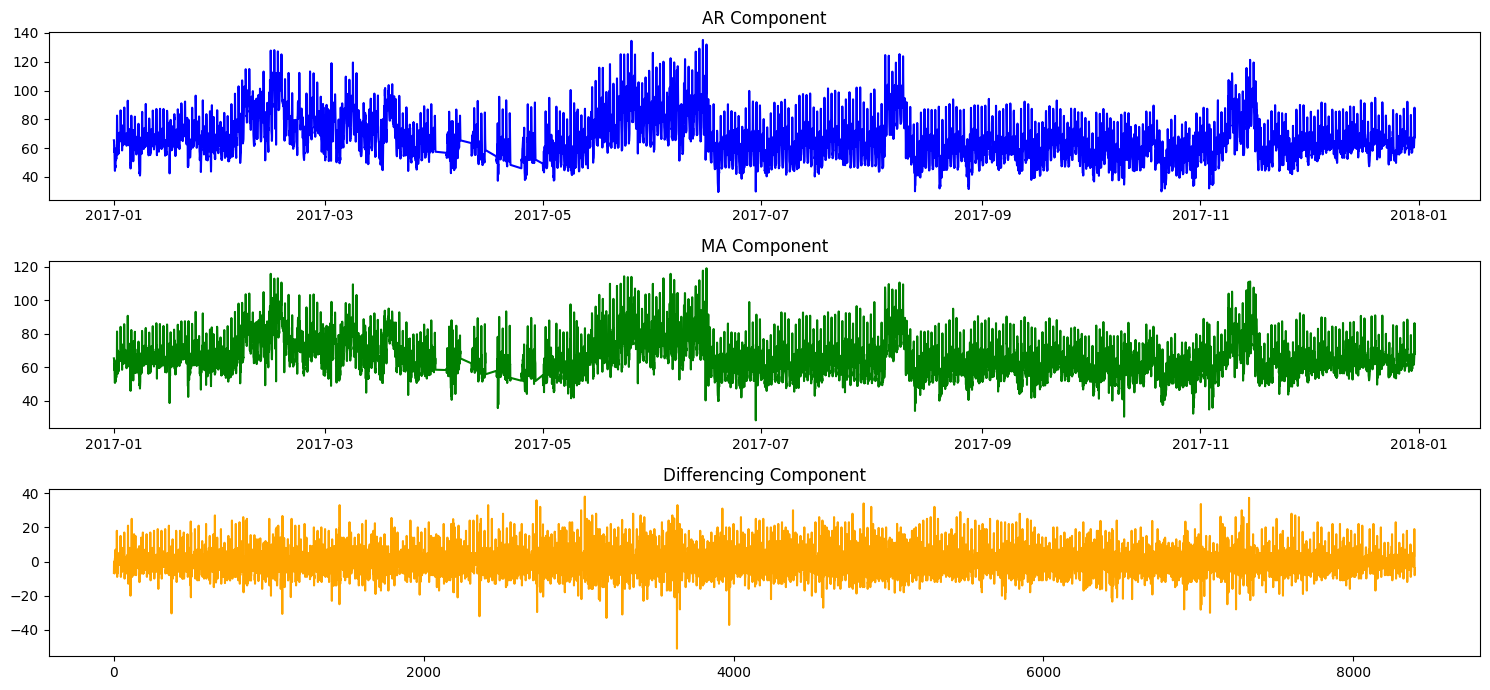

In [67]:
# AR Model (AutoRegressive)
model_ar = sm.tsa.ARIMA(data, order=(2, 0, 0))  # AR(p=2), no differencing (d=0), no MA term (q=0)
results_ar = model_ar.fit()
components_ar = results_ar.fittedvalues
# MA Model (Moving Average)
model_ma = sm.tsa.ARIMA(data, order=(0, 0, 2))  # AR(p=0), no differencing (d=0), MA(q=2)
results_ma = model_ma.fit()
components_ma = results_ma.fittedvalues

# Differencing Component
diff_data = data.diff().dropna()  # Differencing to remove trend
components_diff = diff_data.values.flatten()

# Plotting components
plt.figure(figsize=(15, 7))

# AR Component
plt.subplot(311)
plt.plot(components_ar, color='blue')
plt.title('AR Component')

# MA Component
plt.subplot(312)
plt.plot(components_ma, color='green')
plt.title('MA Component')

# Differencing Component
plt.subplot(313)
plt.plot(components_diff, color='orange')
plt.title('Differencing Component')

plt.tight_layout()
plt.show()



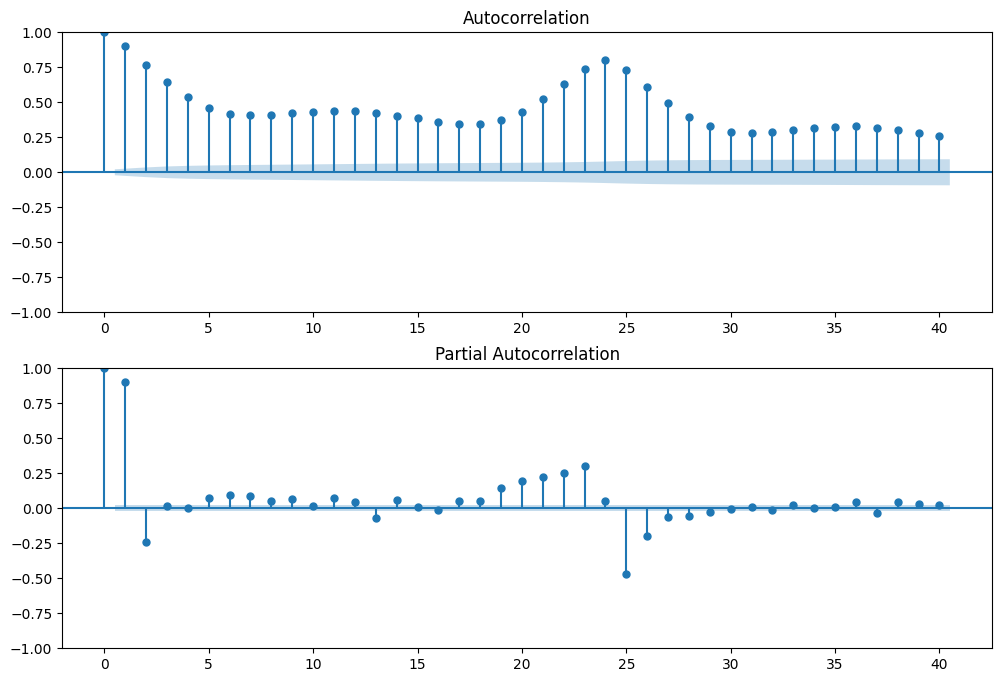

In [68]:
import statsmodels.api as sm
# Plot ACF and PACF
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
sm.graphics.tsa.plot_acf(data, lags=40, ax=ax1)
sm.graphics.tsa.plot_pacf(data, lags=40, ax=ax2)
plt.show()